<a href="https://colab.research.google.com/github/Dataniel31/telco-customer-churn-prediction/blob/main/Telco_Customer_Competition_SCI_IA_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Competition - SCI IA 2024

## 1. Introducción

### 1.1 Descripción del Proyecto

El objetivo de este proyecto es predecir la cancelación de clientes para una empresa de telecomunicaciones. Utilizamos un modelo de regresión logística para identificar clientes propensos a cancelar sus servicios basándonos en datos históricos.

### 1.2 Dataset

- **Train Dataset:** `train.csv` con datos sobre clientes y su historial de cancelación.
- **Test Dataset:** `test.csv` para hacer predicciones y evaluar el modelo.

In [36]:
!wget https://raw.githubusercontent.com/Dataniel31/telco-customer-churn-prediction/main/train.csv
!wget https://raw.githubusercontent.com/Dataniel31/telco-customer-churn-prediction/main/test.csv


--2024-08-30 03:30:23--  https://raw.githubusercontent.com/Dataniel31/telco-customer-churn-prediction/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 658019 (643K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 642.60K  --.-KB/s    in 0.05s   

2024-08-30 03:30:24 (13.0 MB/s) - ‘train.csv’ saved [658019/658019]

--2024-08-30 03:30:24--  https://raw.githubusercontent.com/Dataniel31/telco-customer-churn-prediction/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275229

## 2. Exploración de Datos

A continuación, cargamos y exploramos los datos del conjunto de entrenamiento para entender su estructura y preparar los datos para el modelado.



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [38]:
# Cargamos el dataset de entrenamiento
train_df = pd.read_csv('train.csv')


In [39]:
#Mostar las priemras filas del dataset
train_df.head()

,ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5726,Female,0,No,No,5.0,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,80.20,384.25,No
1,5510,Female,1,No,No,3.0,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,86.85,220.95,Yes
2,1272,Female,0,Yes,No,3.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
3,3577,Female,0,No,No,60.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.55,4847.05,No
4,6546,Female,0,No,No,12.0,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.90,1120.95,Yes


In [40]:
#informacion general sobre el dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4930 non-null   int64  
 1   gender            4930 non-null   object 
 2   SeniorCitizen     4930 non-null   int64  
 3   Partner           4930 non-null   object 
 4   Dependents        4930 non-null   object 
 5   tenure            4883 non-null   float64
 6   PhoneService      4930 non-null   object 
 7   MultipleLines     4930 non-null   object 
 8   InternetService   4872 non-null   object 
 9   OnlineSecurity    4872 non-null   object 
 10  OnlineBackup      4872 non-null   object 
 11  DeviceProtection  4872 non-null   object 
 12  TechSupport       4872 non-null   object 
 13  StreamingTV       4872 non-null   object 
 14  StreamingMovies   4872 non-null   object 
 15  Contract          4930 non-null   object 
 16  PaperlessBilling  4930 non-null   object 


In [41]:
#verificamos los valores nulos dentro de nuestro dataset
print(train_df.isnull().sum())

ID                   0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              47
PhoneService         0
MultipleLines        0
InternetService     58
OnlineSecurity      58
OnlineBackup        58
DeviceProtection    58
TechSupport         58
StreamingTV         58
StreamingMovies     58
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      90
TotalCharges         7
Churn                0
dtype: int64


### 2.1 Imputación de Valores Nulos

Para manejar los valores nulos en el dataset, utilizamos la mediana o valores predeterminados adecuados. Esto se realiza de la siguiente manera:

- **Duración del Cliente (`tenure`):** Se imputa con la mediana de la columna.
- **Servicio de Internet (`InternetService`):** Se imputa con 'No' para aquellos clientes que no tienen un servicio de internet especificado.
- **Servicios Relacionados con Internet:** Las columnas como `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` y `StreamingMovies` se imputan con 'No'.
- **Cargos Mensuales (`MonthlyCharges`):** Se imputa con la mediana de la columna.
- **Cargos Totales (`TotalCharges`):** Se imputa calculando el producto de `tenure` y `MonthlyCharges` para aquellos valores que faltan.


In [42]:
#imputacion de valores nulos
train_df['tenure'].fillna(train_df['tenure'].median(), inplace=True)
train_df['InternetService'].fillna('No', inplace=True)

cols_related_to_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_related_to_internet:
    train_df[col].fillna('No', inplace=True)


In [43]:
train_df['MonthlyCharges'].fillna(train_df['MonthlyCharges'].median(), inplace=True)
train_df['TotalCharges'].fillna(train_df['tenure'] * train_df['MonthlyCharges'], inplace=True)



In [44]:
#Verificar valores nulos despues de la imputacion de valores1
null_values_after = train_df.isnull().sum()
print(null_values_after)


ID                  0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 2.2 Detección de Outliers

Visualizamos los outliers en variables clave utilizando boxplots. Esto nos permite identificar valores atípicos en las siguientes columnas:

- **Duración del Cliente (`tenure`):** Representa la cantidad de meses que el cliente ha estado con la empresa.
- **Cargos Mensuales (`MonthlyCharges`):** Muestra el monto que el cliente paga mensualmente.
- **Cargos Totales (`TotalCharges`):** Indica el monto total facturado al cliente durante su relación con la empresa.

Los boxplots proporcionan una representación visual de los valores extremos que pueden influir en el análisis y la modelización.


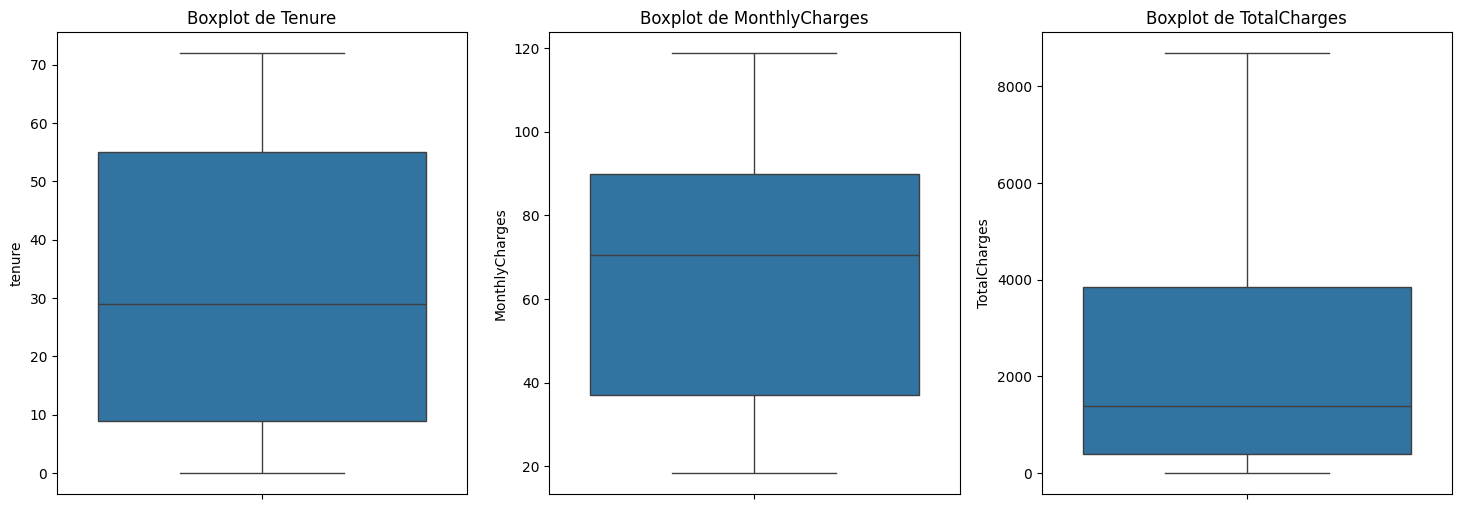

In [45]:
# visualizar los outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=train_df, y='tenure', ax=axes[0])
axes[0].set_title('Boxplot de Tenure')

sns.boxplot(data=train_df, y='MonthlyCharges', ax=axes[1])
axes[1].set_title('Boxplot de MonthlyCharges')

sns.boxplot(data=train_df, y='TotalCharges', ax=axes[2])
axes[2].set_title('Boxplot de TotalCharges')

plt.show()


### 2.3 Transformación de Variables Categóricas

Convertimos las variables categóricas en variables numéricas utilizando **One-Hot Encoding**. Este método crea columnas binarias (0 o 1) para cada categoría de las variables categóricas. En nuestro caso, se aplicó One-Hot Encoding a las siguientes columnas:

- **Género (`gender`)**
- **Pareja (`Partner`)**
- **Dependientes (`Dependents`)**
- **Servicio Telefónico (`PhoneService`)**
- **Líneas Múltiples (`MultipleLines`)**
- **Servicio de Internet (`InternetService`)**
- **Seguridad en Línea (`OnlineSecurity`)**
- **Respaldo en Línea (`OnlineBackup`)**
- **Protección de Dispositivos (`DeviceProtection`)**
- **Soporte Técnico (`TechSupport`)**
- **TV en Streaming (`StreamingTV`)**
- **Películas en Streaming (`StreamingMovies`)**
- **Contrato (`Contract`)**
- **Facturación Sin Papel (`PaperlessBilling`)**
- **Método de Pago (`PaymentMethod`)**

El uso de One-Hot Encoding permite que las variables categóricas sean interpretadas adecuadamente por los modelos de aprendizaje automático, que requieren entradas numéricas.


In [46]:
# variables categoricas -> a numericas
train_df_encoded = pd.get_dummies(train_df, columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'], drop_first=True)

print(train_df_encoded.head())

     ID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn  \
0  5726              0     5.0           80.20        384.25    No   
1  5510              1     3.0           86.85        220.95   Yes   
2  1272              0     3.0           75.15        216.75   Yes   
3  3577              0    60.0           80.55       4847.05    No   
4  6546              0    12.0           98.90       1120.95   Yes   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0        False        False           False              True  ...   
1        False        False           False              True  ...   
2        False         True           False              True  ...   
3        False        False           False              True  ...   
4        False        False           False              True  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False             True   
1                            False             T

### 2.4 Manejo del Desbalanceo de Clases

Churn
No     73.46856
Yes    26.53144
Name: proportion, dtype: float64


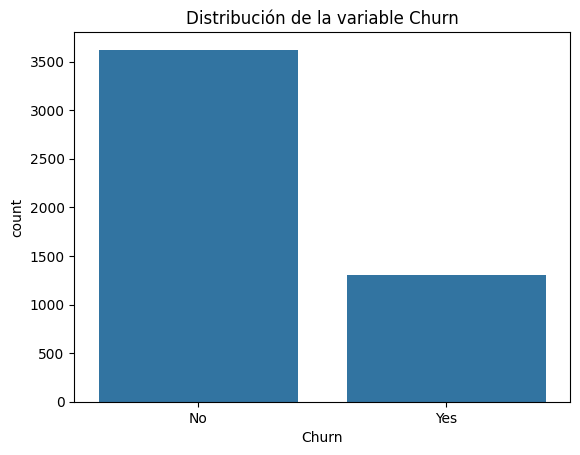

In [47]:

churn_distribution = train_df['Churn'].value_counts(normalize=True) * 100
print(churn_distribution)


sns.countplot(x='Churn', data=train_df)
plt.title('Distribución de la variable Churn')
plt.show()


Utilizamos **SMOTE** para manejar el desbalanceo en las clases.

In [48]:

X = train_df_encoded.drop(columns=['Churn'])
y = train_df_encoded['Churn']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print(y_resampled.value_counts(normalize=True) * 100)


Churn
No     50.0
Yes    50.0
Name: proportion, dtype: float64


### 2.5 División de Datos y Escalado
Dividimos los datos en conjuntos de entrenamiento y prueba, y escalamos las características.

In [49]:
#Dividimos los datos

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

#escalado de caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Modelado
Entrenamos y evaluamos un modelo de **regresión logística**.

In [50]:
# Entrenamiento del modelo
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.82      0.83      0.82      1087
         Yes       0.83      0.81      0.82      1087

    accuracy                           0.82      2174
   macro avg       0.82      0.82      0.82      2174
weighted avg       0.82      0.82      0.82      2174

[[904 183]
 [203 884]]


## 4. Predicción en el Conjunto de Prueba
Realizamos predicciones en el conjunto de prueba(test.csv) y preparamos el archivo para la presentación.


In [51]:
# Cargar el dataset de prueba
test_df = pd.read_csv('test.csv')


In [52]:
# Imputación de valores nulos
test_df['tenure'].fillna(train_df['tenure'].median(), inplace=True)
test_df['InternetService'].fillna('No', inplace=True)
for col in cols_related_to_internet:
    test_df[col].fillna('No', inplace=True)
test_df['MonthlyCharges'].fillna(train_df['MonthlyCharges'].median(), inplace=True)
test_df['TotalCharges'].fillna(test_df['tenure'] * test_df['MonthlyCharges'], inplace=True)

# Transformación de variables categoricas a numericas en test.csv
test_df_encoded = pd.get_dummies(test_df, columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'], drop_first=True)

#aseguramos que las columnas del test.csv coincidad con las del train.csv
test_df_encoded = test_df_encoded.reindex(columns=X_resampled.columns, fill_value=0)
X_test_scaled = scaler.transform(test_df_encoded)


In [53]:
#realizamos predicciones
y_test_pred = model.predict(X_test_scaled)


In [54]:
#preramos el archivo de presentacion para kaggle
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Churn': y_test_pred
})

submission_df.to_csv('submission.csv', index=False)


## 5. Conclusiones
Este notebook ha cubierto el proceso de predicción de la deserción de clientes utilizando un modelo de regresión logística. Hemos abordado la imputación de valores nulos, el manejo del desbalanceo de clases, la transformación de variables categóricas, y la evaluación del modelo.
